#  📝 Práctica: Detección de esquinas con algoritmo de Harris

## Nombre del alumno: Jesús Alberto Aréchiga Carrillo

## Fecha: 30/11/2025

## Objetivo
El objetio de esta práctia consiste en implementar el algoritmo de Harris para la detección de esquinas.

## Implementación:
Primero, importa los módulos necesarios.

In [1]:
#Write your code here
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Ahora, carga la imagen 'figuras.png' y muéstrala.

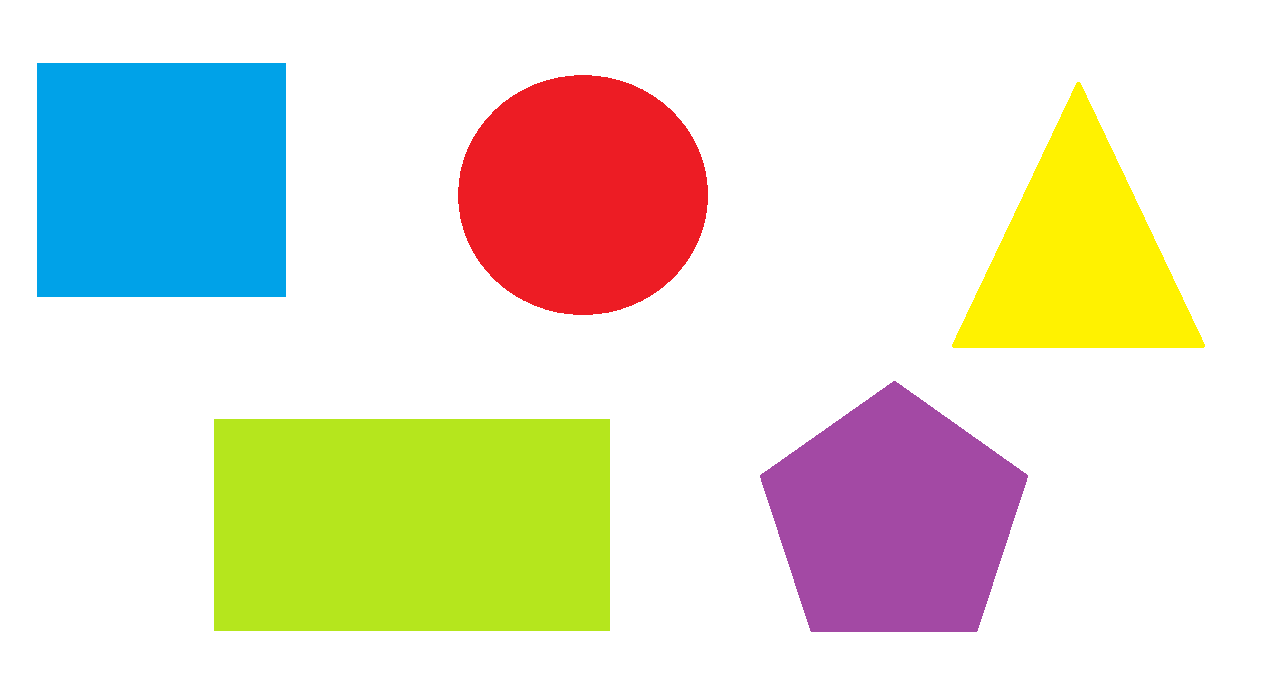

In [2]:
#Write your code here
img = cv2.imread('figuras.png')
cv2_imshow(img)

Convierte la imagen RGB a escala de grises y muéstrala

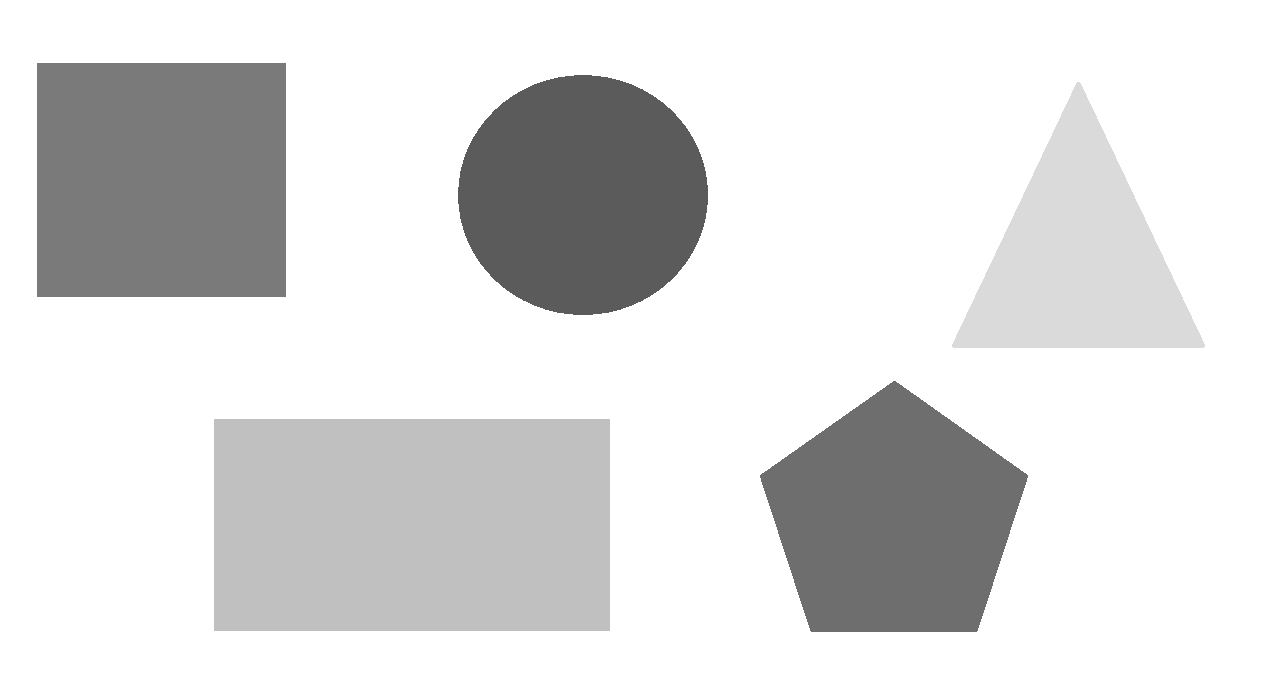

In [3]:
#Write your code here
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

1. Aplica un filtro Box de 3x3 a la imagen en escala de grises y muestra la imagen filtrada

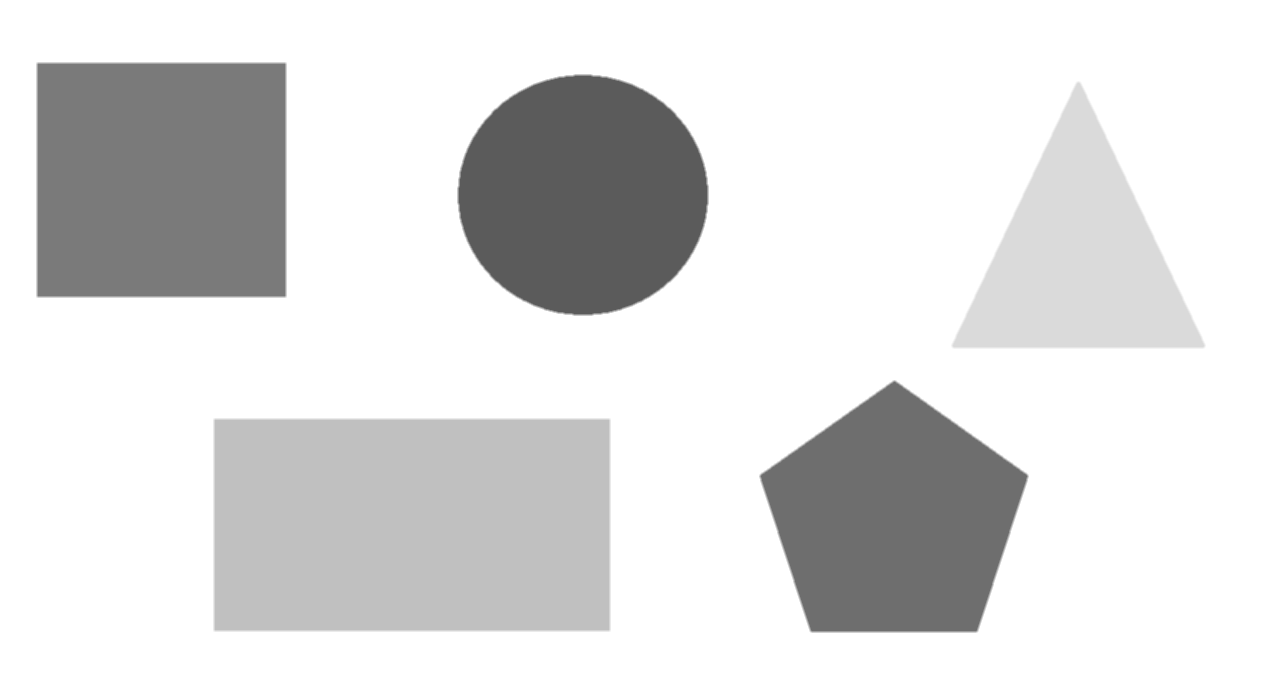

In [4]:
#Write your code here
gray_filtered = cv2.boxFilter(gray, -1, (3, 3))
cv2_imshow(gray_filtered)

2. Calcula los gradientes en 'x' y 'y' usando el filtro Sobel

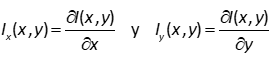

In [5]:
#Write your code here
Ix = cv2.Sobel(gray_filtered, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray_filtered, cv2.CV_64F, 0, 1, ksize=3)

3. Calcula los elementos de la matriz de estructuras HE: HE11, HE12 y HE22

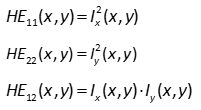

In [6]:
#Write your code here
HE11 = Ix * Ix
HE12 = Ix * Iy
HE22 = Iy * Iy

4. Aplica un filtro Gauss Hσ de 5x5 con SigmaX = 0 a cada elemento de la matriz de estructuras HE11, HE12 y HE22 para obtener A, B y C

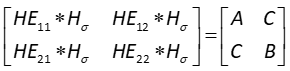

In [7]:
#Write your code here
A = cv2.GaussianBlur(HE11, (5, 5), sigmaX=0)
B = cv2.GaussianBlur(HE12, (5, 5), sigmaX=0)
C = cv2.GaussianBlur(HE22, (5, 5), sigmaX=0)

5. Calcula la función del valor de la esquina V(x,y).

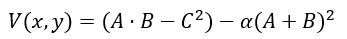

Recuerda que el valor de alpha está entre 0.04 y 0.25. Entre más grande, menor sensibilidad a la detección de esquinas.

In [8]:
#Write your code here
alpha = 0.04  # Valor típico entre 0.04 y 0.25
det_H = A * C - B * B
trace_H = A + C
V = det_H - alpha * (trace_H ** 2)

6. Determina los puntos esquina potenciales con un umbral th. Recuerda que este umbral puede estar entre 900 y 100,000, dependiendo de la imagen. Muestra la imagen U que contiene las esquinas potenciales.

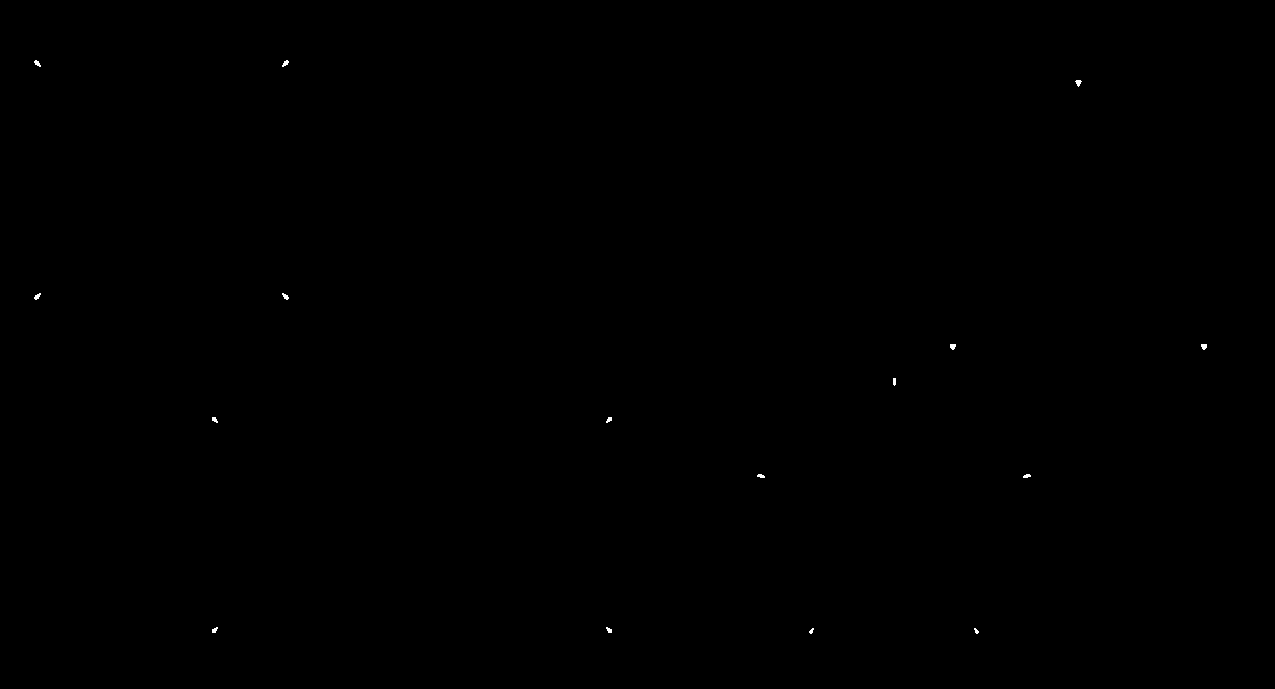

In [9]:
#Write your code here
th = 10000  # Umbral entre 900 y 100,000
U = np.zeros_like(V)
U[V > th] = 1
cv2_imshow(np.uint8(U*255))

7. Define una función para aplicar filtro "máximo" de 3x3 para seleccionar los pixeles cuyo valor V(x,y) sea el más grande dentro de la vecinadad 8.

In [10]:
def maxFilter(V, U):
    #Write your code here
    S = np.zeros_like(U)
    rows, cols = V.shape

    for i in range(1, rows-1):
        for j in range(1, cols-1):
            if U[i, j] == 1:
                # Extraer vecindad 3x3
                neighborhood = V[i-1:i+2, j-1:j+2]
                # Si el valor central es el máximo en la vecindad
                if V[i, j] == np.max(neighborhood):
                    S[i, j] = 1

    return S

8. Aplica el filtro maxFilter y muestra la imagen resultante que contiene las esquinas detectadas.

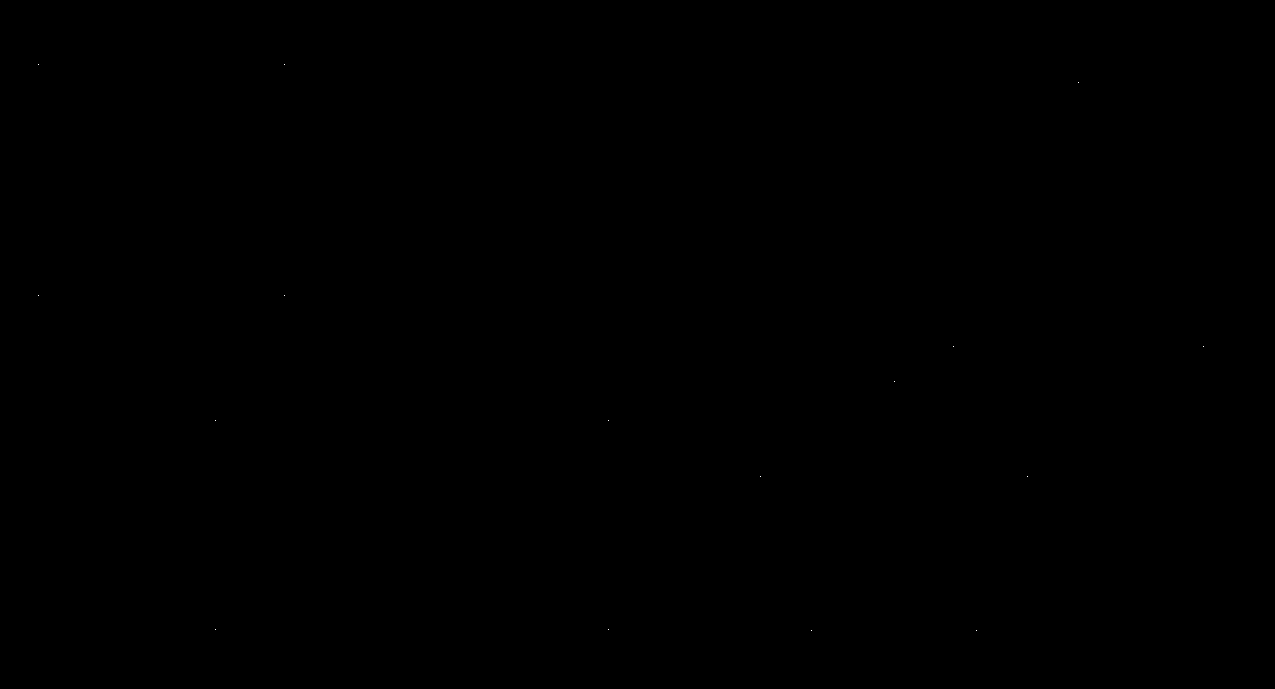

In [11]:
S = maxFilter(V, U)
cv2_imshow(np.uint8(S*255))

9. Dibuja las esquinas encontradas en la imagen RGB

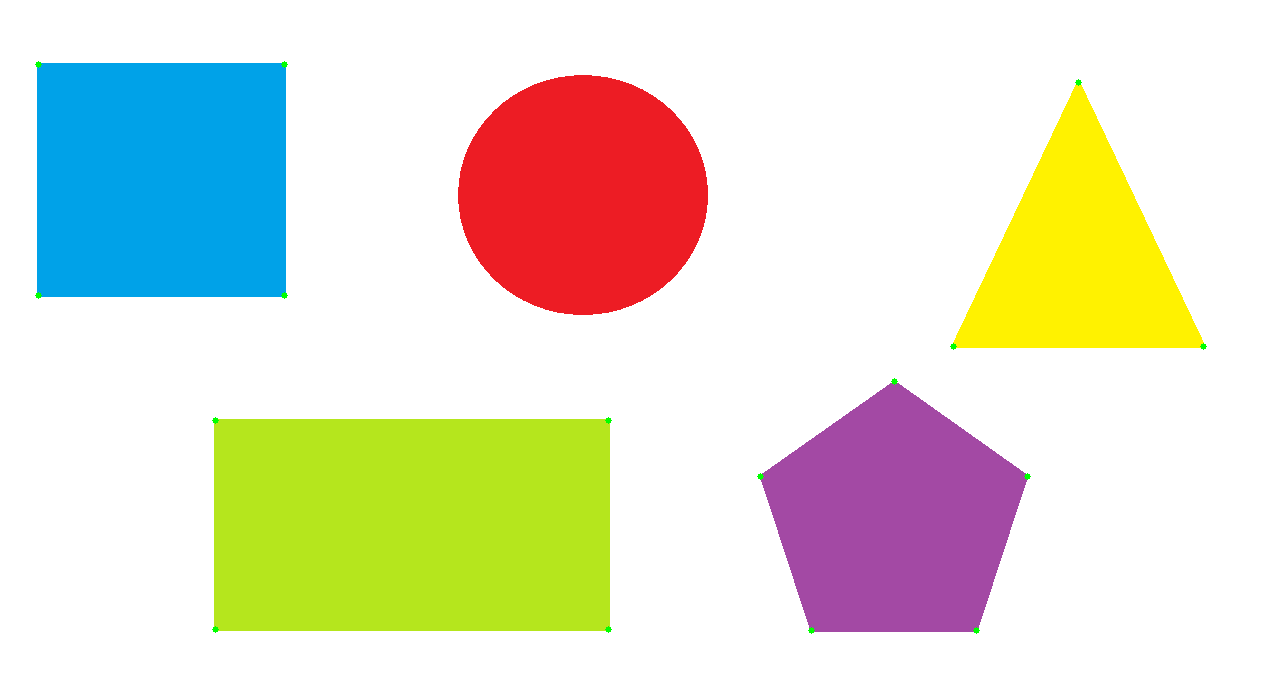

In [12]:
imgHarris = img.copy()
coor = np.argwhere(S)
color = (0, 255, 0)
for i in range(coor.shape[0]):
  cv2.circle(imgHarris, np.flip(coor[i,:]),radius=3,color=color,thickness=-1)
cv2_imshow(imgHarris)


OpenCV Harris - Image with corners



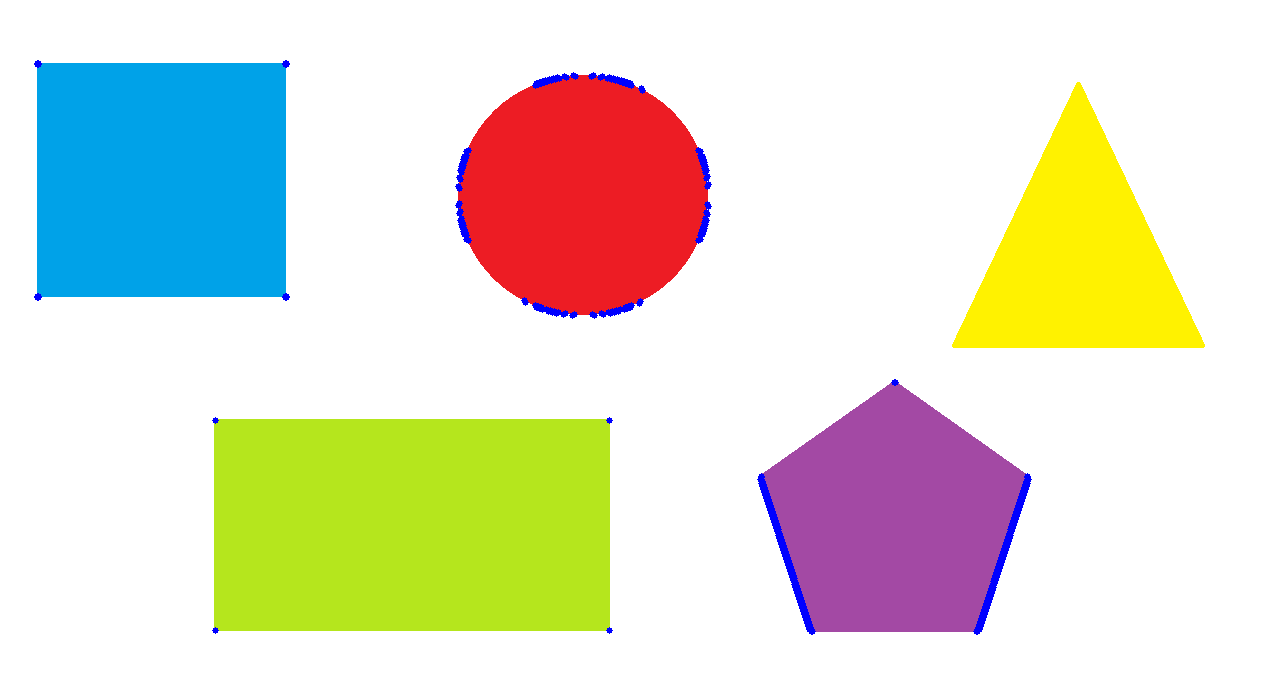

In [26]:
# Deteccion de esquinas con cv.CornerHarris()

imgGrayValues = (gray*255).astype(np.uint8)
imgGrayValues32 = np.float32(imgGrayValues)
corners_cv = cv2.cornerHarris(imgGrayValues32, blockSize=2, ksize=3, k=0.05)
thr_cv = 1000000
corners_cv = corners_cv > thr_cv
imgHarris2 = img.copy()
coor = np.argwhere(corners_cv)
color = (255, 0, 0)
for i in range(coor.shape[0]):
  cv2.circle(imgHarris2, np.flip(coor[i,:]), radius=3, color=color, thickness=-1)
print("OpenCV Harris - Image with corners\n")
cv2_imshow(imgHarris2)

Scikit Image Harris - Image with corners



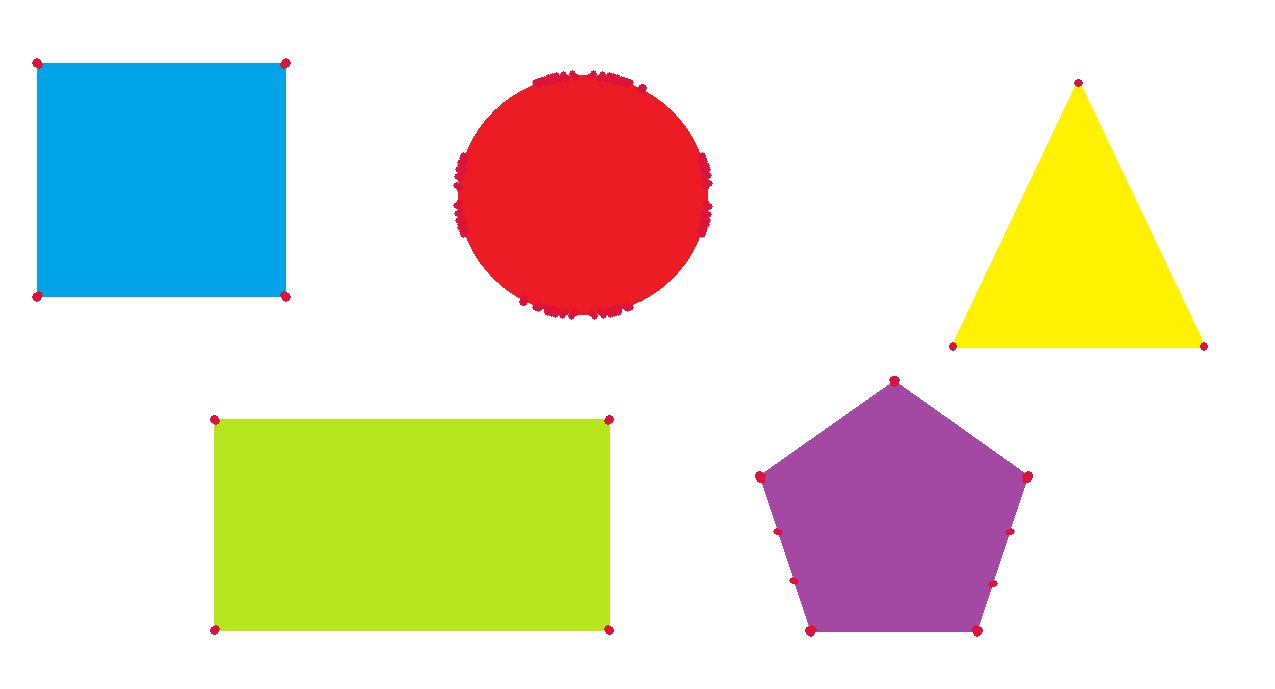

In [23]:
# Deteccion de esquinas con corner_harris() de scikit-image
from skimage.feature import corner_harris

corners_sk = corner_harris(imgGrayValues32, k=0.05, sigma=1, method='k')
thr_sk = 10000000
corners_sk = corners_sk > thr_sk
color = (60, 20, 220)
imgHarris3 = img.copy()
coor = np.argwhere(corners_sk)
for i in range(coor.shape[0]):
  cv2.circle(imgHarris3, np.flip(coor[i,:]), radius=3, color=color, thickness=-1)
print("Scikit Image Harris - Image with corners\n")
cv2_imshow(imgHarris3)

#Conclusiones:

El algoritmo de Harris detecta esquinas basándose en cambios de intensidad  en múltiples direcciones

El parámetro alpha controla la sensibilidad: valores más altos detectan  menos esquinas

El umbral th debe ajustarse según las características de cada imagen

La supresión de no-máximos (maxFilter) es crucial para obtener esquinas  precisas y evitar detecciones múltiples

El filtrado previo con Box y Gaussian ayuda a reducir el ruido y mejorar la detección

